In [10]:
# ベイズ最適化
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


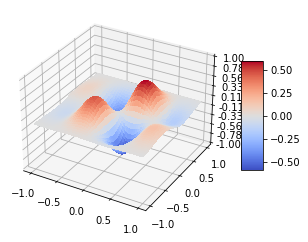

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 10**(-(X-0.1)**2)*10**(-Y**2)*np.sin(5*X)*np.sin(3*Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [17]:
print(Z.argmax())# argmax:一番大きい要素を返す
print(X.flatten()[27328])# zを最大にするxの値
print(Y.flatten()[27328])# zを最大にするyの値

27328
0.28000000000000114
0.3600000000000012


In [22]:
from hyperopt import fmin, tpe, hp

def objective(args):
    x, y = args
    return -10**(-(x-0.1)**2)*10**(-y**2)*np.sin(5*x)*np.sin(3*y)

space = [hp.uniform('x', -1, 1), hp.uniform('y', -1, 1)]

best = fmin(objective,
    space,
    algo=tpe.suggest,
    max_evals=10000)

print(best)

100%|██████████| 10000/10000 [07:35<00:00, 21.94trial/s, best loss: -0.5985908856237393]
{'x': 0.2812446428651648, 'y': 0.35671060209502214}
